# Plotting

``tabensemb.trainer.Trainer`` provides some useful plotting methods to analyse the dataset or results.

In [1]:
import torch
from tabensemb.trainer import Trainer
from tabensemb.model import *
from tabensemb.config import UserConfig
import tabensemb
import os
from tempfile import TemporaryDirectory

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

temp_path = TemporaryDirectory()
tabensemb.setting["default_output_path"] = os.path.join(temp_path.name, "output")
tabensemb.setting["default_config_path"] = os.path.join(temp_path.name, "configs")
tabensemb.setting["default_data_path"] = os.path.join(temp_path.name, "data")

trainer = Trainer(device=device)
cfg = UserConfig.from_uci("Auto MPG", sep="\s+")
trainer.load_config(cfg)
trainer.load_data()
models = [
    PytorchTabular(trainer, model_subset=["Category Embedding"]),
    CatEmbed(trainer, model_subset=["Category Embedding"])
]
trainer.add_modelbases(models)
trainer.train(stderr_to_stdout=True)

Using cuda device
cylinders is Integer and will be treated as a continuous feature.
model_year is Integer and will be treated as a continuous feature.
origin is Integer and will be treated as a continuous feature.
Unknown values are detected in ['horsepower']. They will be treated as np.nan.
The project will be saved to /tmp/tmppq1coaqc/output/auto-mpg/2023-08-31-17-05-45-0_UserInputConfig


/home/xlluo/hdd/tabular_ensemble/tabensemb/data/datamodule.py:536: UserWarning: The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
  warnings.warn(


Dataset size: 238 80 80
Data saved to /tmp/tmppq1coaqc/output/auto-mpg/2023-08-31-17-05-45-0_UserInputConfig (data.csv and tabular_data.csv).

-------------Run PytorchTabular-------------

Training Category Embedding
Global seed set to 42
2023-08-31 17:05:45,911 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
2023-08-31 17:05:45,911 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
2023-08-31 17:05:45,919 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-08-31 17:05:45,928 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
Auto select gpus: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-08-31 17:05:46,644 - {pytorch_tabular.tabular_model:582} - INFO - Training Started
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type  

If LaTeX is detected, `matplotlib.rc("text", usetex=True)` is called to use LaTeX for a better text appearance. However, if there exist `"_"` in feature names, LaTeX will throw errors. Here we reset defaults of `matplotlib.rcParams` to disable LaTeX.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams["figure.autolayout"] = True

`Trainer.plot_feature_box` will show the box plot of features.

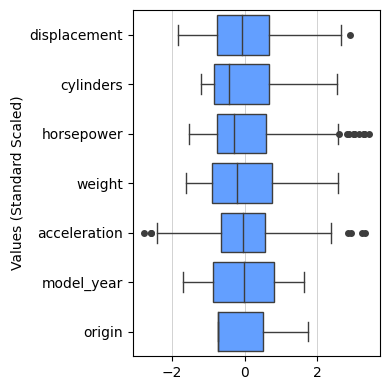

In [3]:
trainer.plot_feature_box(imputed=True, figure_kwargs=dict(figsize=(4, 4)))

`Trainer.plot_pairplot` will show correlations between each two features. It uses `seaborn.pairplot` to achieve this, so the plot can be customized by passing the `pairplot_kwargs` argument. See [the documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for possible arguments.


**Remark**: All methods introduced in this part pass arguments, such as `figure_kwargs`, `bar_kwargs`, `pairplot_kwargs`, etc., to corresponding functions for limited but sufficient customization. See the API docs for their meanings.

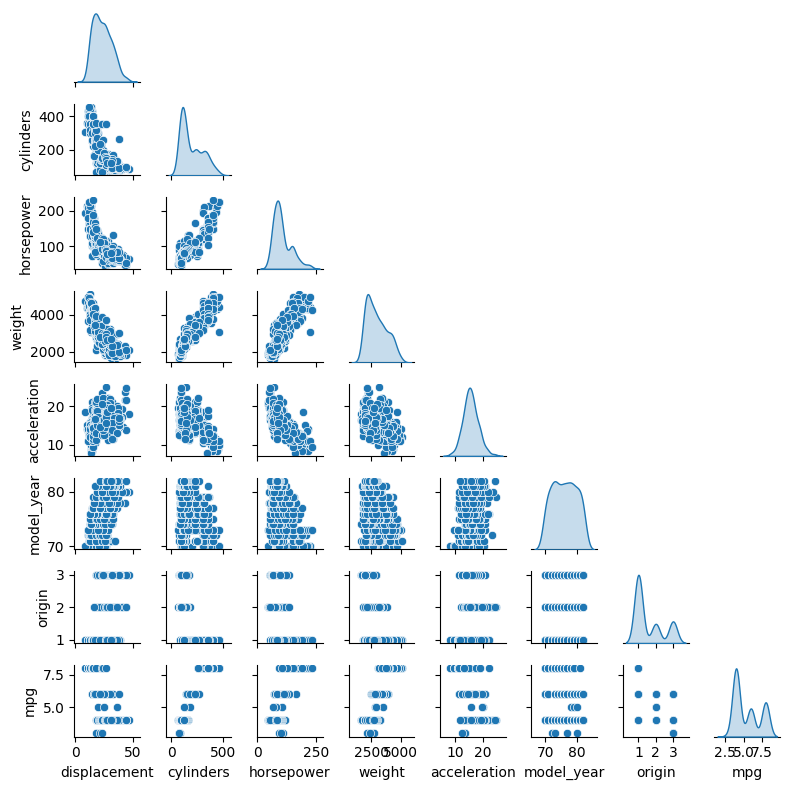

In [4]:
trainer.plot_pairplot(pairplot_kwargs=dict(height=1))

`Trainer.plot_corr` will show the Pearson correlation coefficients between each two features.

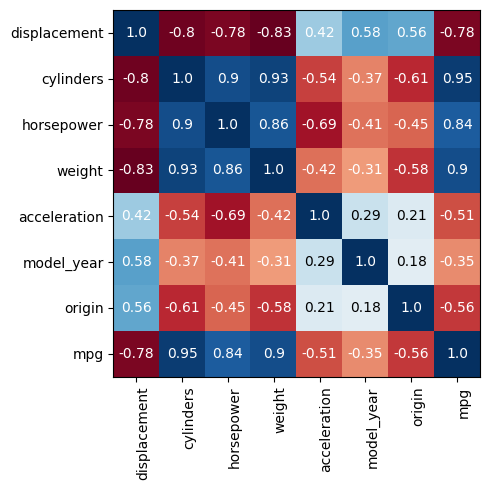

In [5]:
trainer.plot_corr(imputed=True, figure_kwargs=dict(figsize=(5, 5)), imshow_kwargs=dict(cmap="RdBu"))

`Trainer.plot_truth_pred` will show the comparison between ground truth values and predictions. Since all values of the label are integers in this dataset, the plot shows weird but reasonable scatters.

Category Embedding 1/1
Category Embedding 1/1
Training MSE Loss: 0.1282, R2: 0.9545
Validation MSE Loss: 0.1679, R2: 0.9411
Testing MSE Loss: 0.2584, R2: 0.9166


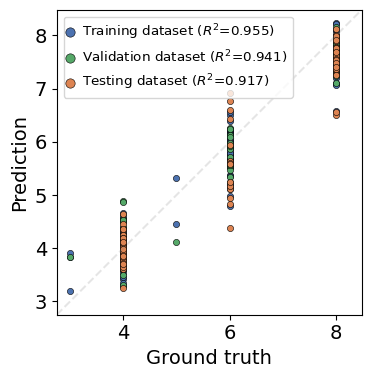

In [6]:
trainer.plot_truth_pred(program="PytorchTabular", log_trans=False, legend_kwargs=dict(fontsize="x-small"), figure_kwargs=dict(figsize=(4, 4)))

`Trainer.plot_feature_importance` calculates and plots feature importance. Two methods are supported to calculate feature importance: `permutation` and `shap`. [Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.) is the decrease of the metric when permuting (shuffling) the feature. [SHAP](https://github.com/shap/shap) is a game theory approach. They might get different results.

For `pytorch` based models, we use `captum` ([link](https://captum.ai/docs/introduction)) and `shap.DeepExplainer` ([link](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html)) for faster calculations.

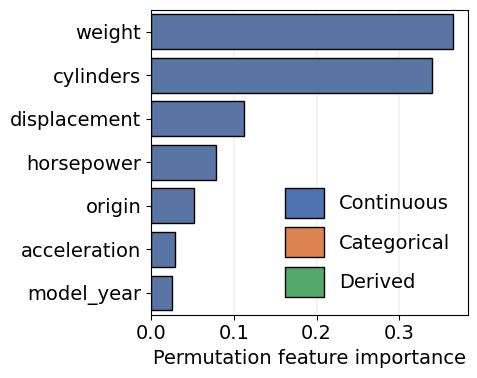

In [7]:
trainer.plot_feature_importance(program="PytorchTabular", model_name="Category Embedding", figure_kwargs=dict(figsize=(5, 4)))

Feature importance less than 1e-5: ['Unscaled (dim 0)', 'Unscaled (dim 1)', 'Unscaled (dim 2)', 'Unscaled (dim 3)', 'Unscaled (dim 4)', 'Unscaled (dim 5)', 'Unscaled (dim 6)']


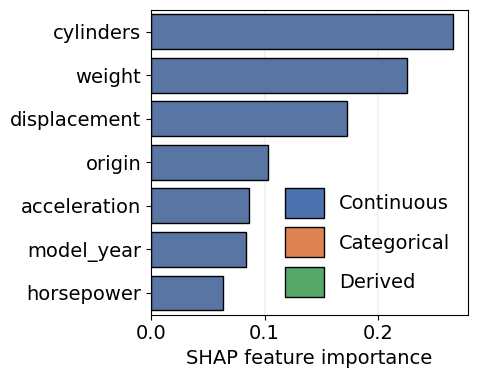

In [8]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    trainer.plot_feature_importance(program="CatEmbed", model_name="Category Embedding", method="shap", figure_kwargs=dict(figsize=(5, 4)))

`Trainer.plot_partial_dependence` uses bootstrap sampling to resample the dataset, fits the model on the resampled dataset, and obtains sequential predictions when assigning sequential values to a feature, to see the dependency of predictions on a feature.

Calculate PDP:  displacement


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  cylinders


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  horsepower


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  weight


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  acceleration


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  model_year


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


Calculate PDP:  origin


The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.
The inferred task multiclass is not consistent with the selected task regression. Using the selected task.


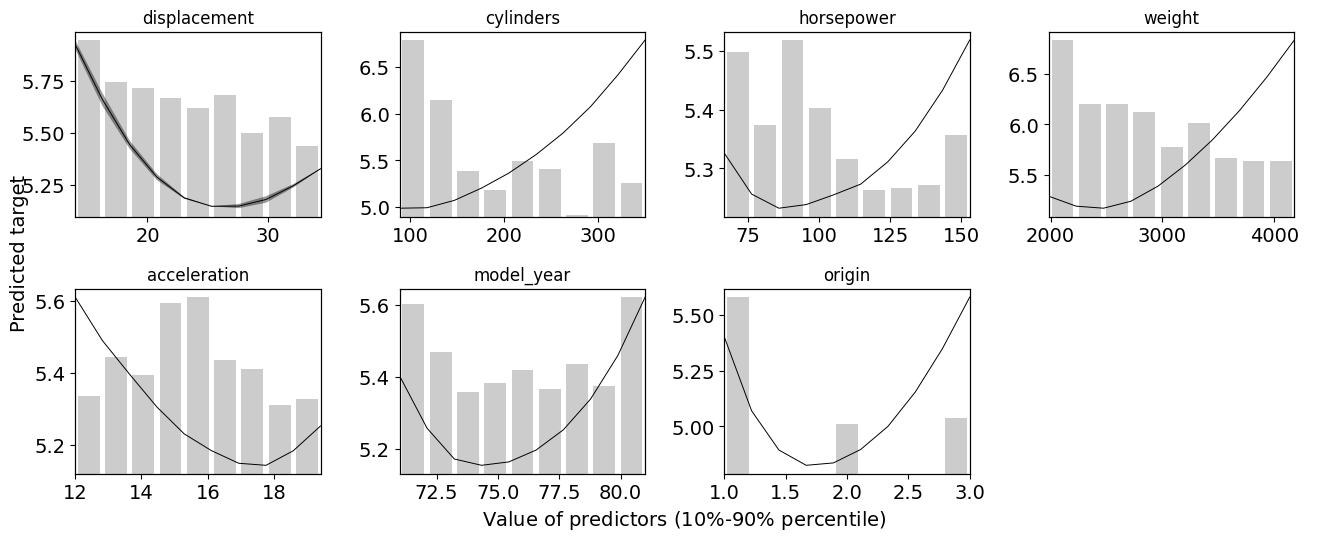

In [9]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    trainer.plot_partial_dependence(program="PytorchTabular", model_name="Category Embedding", n_bootstrap=3, grid_size=10, log_trans=False, upper_lim=9, lower_lim=2, CI=0.95)

`Trainer.plot_partial_err` shows the distribution of absolute error with respect to feature values. If the density of high error predictions is high in a certain range of a certain feature, data augmentation or additional experiments might be required.

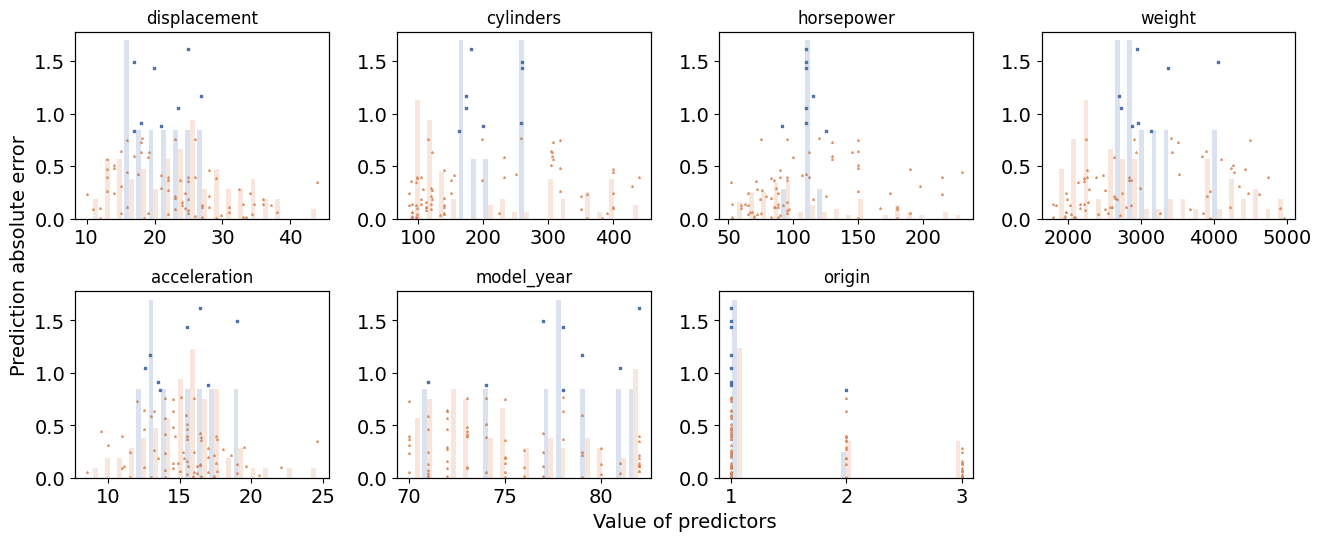

In [10]:
trainer.plot_partial_err(program="PytorchTabular", model_name="Category Embedding")